## Imports and defining planet variables

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from uncertainties import ufloat, umath
from matplotlib  import cm

period_planetb=0.6691392

period_bluhm=9.025
semiamp_bluhm = 4.53
to_bluhm = 2458820.4

period_hirano=2.5891
semiamp_hirano = 5.6
to_hirano = 2458827.46

## Figure 1: HR Diagram

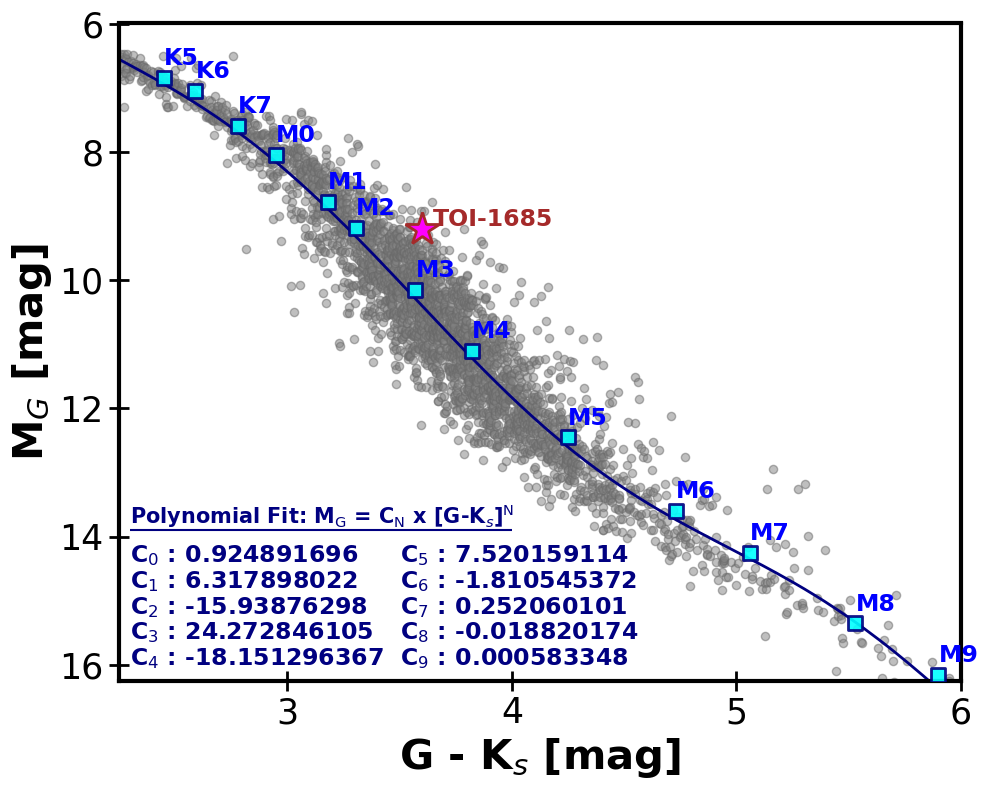

In [75]:
#Read in Field Stars from Eric's file 
HR_Data = pd.read_csv('SIMBAD_25pc_GKs_MG_MKs_minusbinariesWDs_CMDcut_onlydwarfs.dat',delim_whitespace=True, names=['G-Ks','M_G','M_Ks','SpType','Starname'])
HR_Data.sort_values(by='G-Ks')  

#Fit polynomial to Eric's population of field dwarfs, last variable in the coefs function is the polynomial degree
coefs = np.polyfit(HR_Data['G-Ks'], HR_Data['M_G'], 9)
poly = np.poly1d(coefs)

#Set up MS SpType Labels based on Eric's SM code
MS_GKs = [2.45,2.59,2.78,2.95,3.18,3.305,3.57,3.82,4.25,4.73,5.06,5.53,5.9]
MS_MG = [6.85,7.05,7.59,8.05,8.78,9.18,10.15,11.1,12.45,13.6,14.25,15.35,16.15]
MS_SpType = ['K5','K6','K7','M0','M1','M2','M3','M4','M5','M6','M7','M8','M9']


#initialize the figure
fig = plt.figure(1,[10,8])
ax1 = fig.add_subplot(1,1,1)

#Plot the MS dwarf stars
ax1.scatter(HR_Data['G-Ks'], HR_Data['M_G'],alpha=.5,c='grey',edgecolors='dimgrey',marker='o',s=35,zorder=1)
#Plot the MS best-fit polynomial
ax1.plot(HR_Data['G-Ks'], poly(HR_Data['G-Ks']), color='navy',linewidth=2)
#Plot the locations and labels for specific spectral types
ax1.scatter(MS_GKs, MS_MG,alpha=.9,c='cyan',edgecolors='navy',linewidth=2,marker='s',s=100,zorder=3)
for i in range(0,len(MS_GKs)):
    ax1.text(MS_GKs[i],MS_MG[i]-.2,MS_SpType[i],color='blue',fontsize='17',fontweight='bold')

#Add point and label for TOI-1685
ax1.plot([3.6], [9.2], '*',color='navy',ms=25,markerfacecolor='magenta',markeredgecolor='brown',markeredgewidth=2,zorder=4)
ax1.text(3.65,9.15,'TOI-1685',color='brown',fontsize='17',fontweight='bold')

ax1.text(2.3,13.8,'Polynomial Fit: M$_{\mathrm{G}}$ = C$_{\mathrm{N}}$ x [G-K$_{s}$]$^{\mathrm{N}}$',color='navy',fontsize=15,fontweight='bold')
ax1.hlines(13.9,2.3,4,color='navy')

ax1.text(2.3,14.4,'C$_{0}$ : '+str(np.round(coefs[9],9)),color='navy',fontsize='17',fontweight='bold')
ax1.text(2.3,14.8,'C$_{1}$ : '+str(np.round(coefs[8],9)),color='navy',fontsize='17',fontweight='bold')
ax1.text(2.3,15.2,'C$_{2}$ : '+str(np.round(coefs[7],9)),color='navy',fontsize='17',fontweight='bold')
ax1.text(2.3,15.6,'C$_{3}$ : '+str(np.round(coefs[6],9)),color='navy',fontsize='17',fontweight='bold')
ax1.text(2.3,16,'C$_{4}$ : '+str(np.round(coefs[5],9)),color='navy',fontsize='17',fontweight='bold')

ax1.text(3.5,14.4,'C$_{5}$ : '+str(np.round(coefs[4],9)),color='navy',fontsize='17',fontweight='bold')
ax1.text(3.5,14.8,'C$_{6}$ : '+str(np.round(coefs[3],9)),color='navy',fontsize='17',fontweight='bold')
ax1.text(3.5,15.2,'C$_{7}$ : '+str(np.round(coefs[2],9)),color='navy',fontsize='17',fontweight='bold')
ax1.text(3.5,15.6,'C$_{8}$ : '+str(np.round(coefs[1],9)),color='navy',fontsize='17',fontweight='bold')
ax1.text(3.5,16,'C$_{9}$ : '+str(np.round(coefs[0],9)),color='navy',fontsize='17',fontweight='bold')


#Label the axes
ax1.set_xlabel('G - K$_{s}$ [mag]',fontsize=30,fontweight='bold')
ax1.set_ylabel('M$_{G}$ [mag]',fontsize=30,fontweight='bold')

#Set axes limits
ax1.set_ylim(16.25,6)
ax1.set_xlim(2.25,6)

#Set up tick formatting
ax1.tick_params(axis='both',which='major',labelsize=25,direction='inout',length=15,width=2)
ax1.set_xticks([3,4,5,6])

plt.setp(ax1.spines.values(), linewidth=3)

plt.tight_layout()

#plt.show()              
plt.savefig('TOI1685_HRDiagram_Eqn.pdf')

## Figure 2: VOSA SED

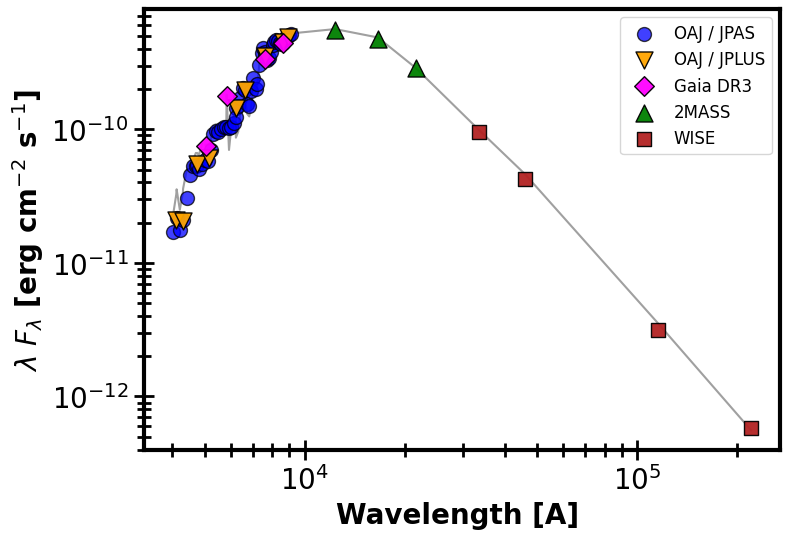

In [72]:
VOSA_Data = pd.read_csv('TOI1685_VOSA.dat',delim_whitespace=True,skiprows=40,dtype={'FilterID':str,'Wavelength': np.float64, 'Obs.Flux': np.float64, 
                                                                                    'Obs.Error': np.float64, 'Flux': np.float64, 'Error': np.float64,
                                                                                    'FluxMod': np.float64, 'Fitted':int, 'Excess':int, 'FitExc':str, 'UpLim':str})

jpas_phot = VOSA_Data[VOSA_Data['FilterID'].str.contains('OAJ/JPAS')] 
jplus_phot = VOSA_Data[VOSA_Data['FilterID'].str.contains('OAJ/JPLUS')] 
gaia_phot = VOSA_Data[VOSA_Data['FilterID'].str.contains('GAIA')] 
twomass_phot = VOSA_Data[VOSA_Data['FilterID'].str.contains('2MASS')] 
wise_phot = VOSA_Data[VOSA_Data['FilterID'].str.contains('WISE')] 

#initialize the figure
fig = plt.figure(1,[8,5.5])
ax1 = fig.add_subplot(1,1,1)

#Plot the MS dwarf stars

ax1.plot(VOSA_Data['Wavelength'], VOSA_Data['Wavelength']*VOSA_Data['FluxMod'],alpha=.75,color='grey',zorder=1)
jpas=ax1.scatter(jpas_phot['Wavelength'], jpas_phot['Wavelength']*jpas_phot['Obs.Flux'],alpha=.75,c='blue',edgecolors='black',marker='o',s=100,zorder=2,label='OAJ / JPAS')
jplus=ax1.scatter(jplus_phot['Wavelength'], jplus_phot['Wavelength']*jplus_phot['Obs.Flux'],alpha=.95,c='orange',edgecolors='black',marker='v',s=150,zorder=3,label='OAJ / JPLUS')
gaia=ax1.scatter(gaia_phot['Wavelength'], gaia_phot['Wavelength']*gaia_phot['Obs.Flux'],alpha=.95,c='magenta',edgecolors='black',marker='D',s=100,zorder=5,label='Gaia DR3')
twomass=ax1.scatter(twomass_phot['Wavelength'], twomass_phot['Wavelength']*twomass_phot['Obs.Flux'],alpha=.95,c='green',edgecolors='black',marker='^',s=150,zorder=4,label='2MASS')
wise=ax1.scatter(wise_phot['Wavelength'], wise_phot['Wavelength']*wise_phot['Obs.Flux'],alpha=.95,c='firebrick',edgecolors='black',marker='s',s=100,zorder=4,label='WISE')

ax1.legend(handles=[jpas, jplus, gaia, twomass, wise],loc='upper right',fontsize=12)


#Label the axes
ax1.set_xlabel('Wavelength [A] ',fontsize=20,fontweight='bold')
ax1.set_ylabel('$\lambda\ F_{\lambda}$ [erg cm$^{-2}$ s$^{-1}$]',fontsize=20,fontweight='bold')

ax1.set_xscale('log')
ax1.set_yscale('log')

#Set up tick formatting
ax1.tick_params(axis='both',which='major',labelsize=20,direction='inout',length=15,width=2)
ax1.tick_params(axis='both',which='minor',labelsize=20,direction='inout',length=10,width=2)

#ax1.set_xticks([3,4,5,6])
#ax1.set_xticklabels(['3','4','5','6'])

plt.setp(ax1.spines.values(), linewidth=3)

plt.tight_layout()

#plt.show()              
plt.savefig('TOI1685_SED.pdf')

## Planet Parameter Calculations

In [2]:
#Density Calculation
mass_p = ufloat(3.03, 0.33)
radius_p = ufloat(1.468, 0.051)

density = (mass_p * 5.9760000000002E+27) / ((4/3.) * np.pi * ((radius_p*637800000.)**3))
print('TOI 1685 b density: ',density)


#Luminosity Calculation

R_star = ufloat(0.4555, 0.0128)
a = ufloat(0.01138,0.00035)
Luminosity=ufloat(0.03052,0.00061)
Teff = ufloat(3575., 53.)

#T_Eq
sma = ufloat(0.01138,0.00035) * 215.032156  #(1 AU / 1 Solar radius)
R_star = ufloat(0.4555, 0.0128)

Teq = Teff * umath.sqrt(R_star*0.00465047/(2*a))*(1-0.1)**.25
print('Equilibrium Temp: ',Teq)

#Traditional TSM for J band (used for NIRISS)
scale_factor = 0.19
mJ = 9.616
TSM_J = scale_factor * ((radius_p**3 * T_eq ) / (mass_p * r_star**2)) * 10**(-mJ / 5)
print('J-band TSM: ',TSM_J)


#ESM
hc = 1.98644582E-16 # erg cm
k_b = 1.380649E-16 # erg/K
RS_RE = 109.045013405
K_mag = ufloat(8.758, 0.020)

ESM = 4290000*(umath.exp(hc/(0.00075*k_b*teff))-1)/(umath.exp(hc/(0.00075*k_b*1.1*T_eq))-1)*(radius_p/(RS_RE*r_star))**2*10**(K_mag/-5)
print('ESM: ',ESM)

#Insolation
Insolation = Luminosity / a**2
print('Insolation: ',Insolation)

TOI 1685 b density:  5.3+/-0.8


## Comparisons to B21 and H21 values

In [13]:
B21_Rs, B21_Ms, B21_Rhos = 0.492, 0.495, 5.797
H21_Rs, H21_Ms, H21_Rhos = 0.459, 0.460, 6.70
Burt_Rs, Burt_Ms, Burt_Rhos = 0.4555, 0.454, 6.55

B21_Fbol, B21_Lum, B21_Teff, B21_FeH, B21_Age = -1, 0.0303, 3434, -0.13
H21_Fbol, H21_Lum, H21_Teff, H21_FeH, H21_Age = 6.65, 0.0271, 3461, 0.14, 
Burt_Fbol, Burt_Lum, Burt_Teff, Burt_FeH, Burt_Age = 6.904, 0.03052, 3575, 0.3, 1.0


In [14]:
print('Stellar Parameter Comparisons:')
print('Stellar Mass')
print(np.round(((B21_Ms / Burt_Ms)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_Ms / Burt_Ms)-1)*100.,1),'% smaller than H21')

print('Stellar Radius')
print(np.round(((B21_Rs / Burt_Rs)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_Rs / Burt_Rs)-1)*100.,1),'% smaller than H21')

print('Stellar Density')
print(np.round(((B21_Rhos / Burt_Rhos)-1)*100.,1),'% larger than B21')
print(np.round(((H21_Rhos / Burt_Rhos)-1)*100.,1),'% smaller than H21')

print('Stellar Fbol')
print(np.round(((B21_Fbol / Burt_Fbol)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_Fbol / Burt_Fbol)-1)*100.,1),'% larger than H21')

print('Stellar Luminosity')
print(np.round(((B21_Lum / Burt_Lum)-1)*100.,1),'% larger than B21')
print(np.round(((H21_Lum / Burt_Lum)-1)*100.,1),'% larger than H21')

print('Stellar Teff')
print(np.round(((B21_Teff / Burt_Teff)-1)*100.,1),'% larger than B21')
print(np.round(((H21_Teff / Burt_Teff)-1)*100.,1),'% larger than H21')

print('Stellar FeH')
print(np.round(((B21_FeH / Burt_FeH)-1)*100.,1),'% larger than B21')
print(np.round(((H21_FeH / Burt_FeH)-1)*100.,1),'% larger than H21')

Stellar Parameter Comparisons:
Stellar Mass
9.0 % smaller than B21
1.3 % smaller than H21
Stellar Radius
8.0 % smaller than B21
0.8 % smaller than H21
Stellar Density
-11.5 % larger than B21
2.3 % smaller than H21
Stellar Fbol
-114.5 % smaller than B21
-3.7 % larger than H21
Stellar Luminosity
-0.7 % larger than B21
-11.2 % larger than H21
Stellar Teff
-3.9 % larger than B21
-3.2 % larger than H21
Stellar FeH
-143.3 % larger than B21
-53.3 % larger than H21
Planetary Parameter Comparisons:
Planet Mass
24.8 % smaller than B21
13.2 % smaller than H21
Planet Radius
15.8 % smaller than B21
-0.6 % larger than H21
Planet Density
-20.6 % larger than B21
15.1 % smaller than H21


In [23]:
B21_Rp, B21_Mp, B21_Rhop = 1.70, 3.78, 4.21
H21_Rp, H21_Mp, H21_Rhop = 1.459, 3.43, 6.10
Burt_Rp, Burt_Mp, Burt_Rhop = 1.468, 3.03, 5.30

B21_period, B21_deltaf, B21_tdur, B21_a,B21_inc = 0.6691403, 1000, -1, 0.0118016582, 84.74
H21_period, H21_deltaf, H21_tdur, H21_a,H21_inc = 0.6691416, 1000, -1, 0.011557, 85.59
Burt_period, Burt_deltaf, Burt_tdur, Burt_a,Burt_inc = 0.66913924, 874, 0.918, 0.01138, 87.17

B21_insol, B21_Teq = 217, 1069
#H21_insol, H21_Teq = 
Burt_insol, Burt_Teq = 236, 1062

B21_RpRs, B21_b, B21_K = 0.0317, 0.473, 4.41
H21_RpRs, H21_b, H21_K = 0.0291, 0.416, 4.2
Burt_RpRs, Burt_b, Burt_K = 0.02956, 0.266, 3.76

print('Planetary Parameter Comparisons:')

print('Rp / Rs')
print(np.round(((B21_RpRs / Burt_RpRs)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_RpRs / Burt_RpRs)-1)*100.,1),'% larger than H21')

print('Semiamp')
print(np.round(((B21_K / Burt_K)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_K / Burt_K)-1)*100.,1),'% larger than H21')

print('Planet Mass')
print(np.round(((B21_Mp / Burt_Mp)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_Mp / Burt_Mp)-1)*100.,1),'% smaller than H21')

print('Planet Radius')
print(np.round(((B21_Rp / Burt_Rp)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_Rp / Burt_Rp)-1)*100.,1),'% larger than H21')

print('Planet Density')
print(np.round(((B21_Rhop / Burt_Rhop)-1)*100.,1),'% larger than B21')
print(np.round(((H21_Rhop / Burt_Rhop)-1)*100.,1),'% smaller than H21')

print('Planet Period')
print(np.round(((B21_period / Burt_period)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_period / Burt_period)-1)*100.,1),'% smaller than H21')

print('Planet flux drop')
print(np.round(((B21_deltaf / Burt_deltaf)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_deltaf / Burt_deltaf)-1)*100.,1),'% smaller than H21')

print('Planet SMA')
print(np.round(((B21_a / Burt_a)-1)*100.,1),'% smaller than B21')
print(np.round(((H21_a / Burt_a)-1)*100.,1),'% smaller than H21')

print('Planet inc')
print(np.round(((B21_inc / Burt_inc)-1)*100.,1),'% larger than B21')
print(np.round(((H21_inc / Burt_inc)-1)*100.,1),'% larger than H21')

print('Planet insol')
print(np.round(((B21_insol / Burt_insol)-1)*100.,1),'% smaller than B21')

Planetary Parameter Comparisons:
Rp / Rs
7.2 % smaller than B21
-1.6 % larger than H21
Semiamp
17.3 % smaller than B21
11.7 % larger than H21
Planet Mass
24.8 % smaller than B21
13.2 % smaller than H21
Planet Radius
15.8 % smaller than B21
-0.6 % larger than H21
Planet Density
-20.6 % larger than B21
15.1 % smaller than H21
Planet Period
0.0 % smaller than B21
0.0 % smaller than H21
Planet flux drop
14.4 % smaller than B21
14.4 % smaller than H21
Planet SMA
3.7 % smaller than B21
1.6 % smaller than H21
Planet inc
-2.8 % larger than B21
-1.8 % larger than H21
Planet insol
-8.1 % smaller than B21


In [ ]:
import rvsearch

m_star=0.454
m_star_err=0.018
star_name='TOI-1685'

filename=star_name+'/recoveries.csv'
  
data=rvsearch.inject.Completeness.from_csv(filename,mstar=m_star)
data.recoveries.columns
recov=data.completeness_grid((0.01,.1),(0.01,20),resolution=30, xlogwin=0.5, ylogwin=0.5)

fig = plt.figure(figsize=(7.5, 5.25))
plt.subplots_adjust(bottom=0.18, left=0.22, right=0.95)
CS = plt.contourf(recov[0], recov[1], recov[2], 10, cmap=plt.cm.Reds_r, vmax=0.9)
fifty=plt.contour(recov[0], recov[1], recov[2], [0.5], c='black')
coords= fifty.allsegs[0][0]

plt.plot(coords[:,0],coords[:,1],color='blue')
fifty_xx=coords[:,0]
fifty_yy=coords[:,1]

plt.clf()
plt.close()

bluhm_sma = 0.06521
hirano_sma = 0.02845

hirano_min_mass = np.round(np.interp(star_EEID,fifty_xx,fifty_yy),decimals=1)
bluhm_min_mass  = np.round(np.interp(star_EEID,fifty_xx,fifty_yy),decimals=1)
print('Paper     Mass Sensitivity')
print('Bluhm 21',bluhm_min_mass)
print('Hirano 21',hirano_min_mass)

## Figure 4: RV Semi-amp Comparisons (bottom right panel)

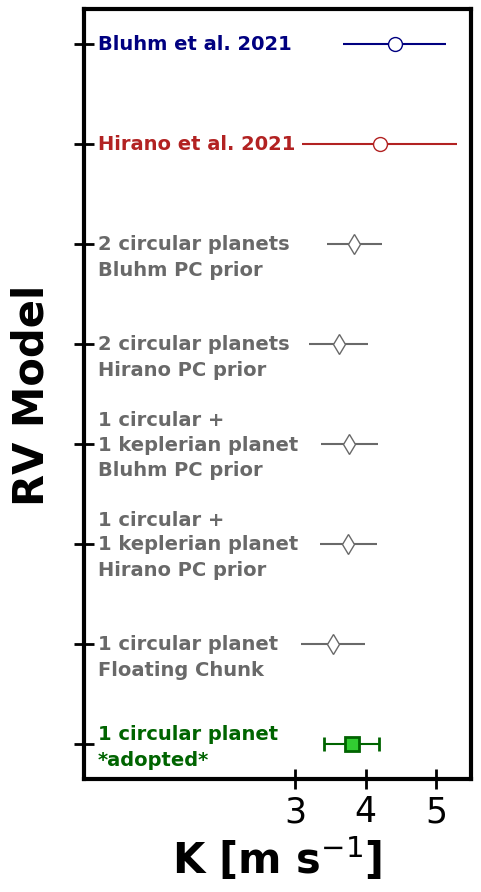

In [3]:
semi_amps = pd.read_csv('SemiAmp_Values.csv')
K_err = (semi_amps['K_UpperErr']+semi_amps['K_LowerErr'])/2
#Plot the FWHM data and GP model

#initialize the figure
fig = plt.figure(1,[5,10])
ax1 = fig.add_subplot(1,1,1)

y_vals=np.arange(8,0,step=-1)

#Bluhm
ax1.errorbar(semi_amps['K'][0], y_vals[0],xerr=K_err[0],yerr=None,
        linestyle='none',markerfacecolor='white',markeredgecolor='navy',
        ecolor='navy',marker='o',ms=10,zorder=3)

#Hirano
ax1.errorbar(semi_amps['K'][1], y_vals[1],xerr=K_err[1],yerr=None,
        linestyle='none',markerfacecolor='white',markeredgecolor='firebrick',
        ecolor='firebrick',marker='o',ms=10,zorder=3)

#New Pyaneti Fits
ax1.errorbar(semi_amps['K'][2:7], y_vals[2:7],xerr=K_err[2:7],yerr=None,
        linestyle='none',markerfacecolor='white',markeredgecolor='dimgrey',
        ecolor='dimgrey',marker='d',ms=10,zorder=3)

#New Pyaneti Fits
ax1.errorbar(semi_amps['K'][7], y_vals[7],xerr=K_err[7],yerr=None,
        linestyle='none',markerfacecolor='limegreen',markeredgewidth=2,capsize=5,
        markeredgecolor='darkgreen',ecolor='darkgreen',marker='s',ms=10,zorder=5)

ax1.text(.2,y_vals[0],'Bluhm et al. 2021',color='Navy',fontsize=14,fontweight='bold',verticalalignment='center')
ax1.text(.2,y_vals[1],'Hirano et al. 2021',color='firebrick',fontsize=14,fontweight='bold',verticalalignment='center')

ax1.text(.2,y_vals[2],'2 circular planets',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')
ax1.text(.2,y_vals[2]-0.25,'Bluhm PC prior',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')

ax1.text(.2,y_vals[3],'2 circular planets',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')
ax1.text(.2,y_vals[3]-0.25,'Hirano PC prior',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')

ax1.text(.2,y_vals[4]+0.25,'1 circular +',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')
ax1.text(.2,y_vals[4],'1 keplerian planet',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')
ax1.text(.2,y_vals[4]-0.25,'Bluhm PC prior',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')


ax1.text(.2,y_vals[5]+0.25,'1 circular +',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')
ax1.text(.2,y_vals[5],'1 keplerian planet',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')
ax1.text(.2,y_vals[5]-0.25,'Hirano PC prior',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')

ax1.text(.2,y_vals[6],'1 circular planet',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')
ax1.text(.2,y_vals[6]-0.25,'Floating Chunk',color='dimgrey',fontsize=14,fontweight='bold',verticalalignment='center')

ax1.text(.2,y_vals[7]+0.1,'1 circular planet',color='darkgreen',fontsize=14,fontweight='bold',verticalalignment='center')
ax1.text(.2,y_vals[7]-0.15,'*adopted*',color='darkgreen',fontsize=14,fontweight='bold',verticalalignment='center')


#ax1.tick_params(axis='both', which='major', labelsize=32)
ax1.set_xlabel('K [m s$^{-1}$]',fontsize=30,fontweight='bold')
ax1.set_ylabel('RV Model',fontsize=30,fontweight='bold')
ax1.tick_params(axis='both',which='major',labelsize=25,direction='inout',length=15,width=2)

ax1.set_xlim(0,5.5)
ax1.set_xticks([3,4,5])

ax1.set_yticks([1,2,3,4,5,6,7,8])
ax1.set_yticklabels([' ']*8)

plt.setp(ax1.spines.values(), linewidth=3)

plt.tight_layout()
plt.show() 
#plt.savefig('TOI1685b_MR_Diagram.pdf')    #Save the figure

## Figure 5: M-R Plot

In [4]:
#Data for Zeng composition lines
Zeng_PureIron = pd.read_csv('/Users/jenburt/Dropbox/Research/DataViz/MR_Diagrams/ZengCompositions/PureIron.csv')
Zeng_PureRock = pd.read_csv('/Users/jenburt/Dropbox/Research/DataViz/MR_Diagrams/ZengCompositions/Silicate.csv')
Zeng_PureWater = pd.read_csv('/Users/jenburt/Dropbox/Research/DataViz/MR_Diagrams/ZengCompositions/PureH20_1000k.csv')
Zeng_EarthLike = pd.read_csv('/Users/jenburt/Dropbox/Research/DataViz/MR_Diagrams/ZengCompositions/EarthLike.csv')
Zeng_HalfWaterHalfRock = pd.read_csv('/Users/jenburt/Dropbox/Research/DataViz/MR_Diagrams/ZengCompositions/50H20_50Rock_1000k.csv')
Zeng_EarthLike_1percentH2 = pd.read_csv('/Users/jenburt/Dropbox/Research/DataViz/MR_Diagrams/ZengCompositions/Earthlike_1PercentH2_1000K.csv')
Zeng_EarthLike_point1percentH2 = pd.read_csv('/Users/jenburt/Dropbox/Research/DataViz/MR_Diagrams/ZengCompositions/Earthlike_0.1PercentH2_1000K.csv')

#JWST Cycle 1 & 2 Planets
JWST_Data = pd.read_csv('JWST_Planets_NamesOnly.csv')

#Data from exoplanet archive
MR_Data = pd.read_csv('ConfirmedPlanets_Oct2023.csv',dtype={'name':str,'period':np.float64,'period_err1':np.float64,'period_err2':np.float64,'semiaxis':np.float64,'radius':np.float64,
                                                            'radius_err1':np.float64,'radius_err2':np.float64,'mass':np.float64,'mass_err1':np.float64,'mass_err2':np.float64,
                                                            'mass_sigma':np.float64,'ecc':np.float64,'ecc_err1':np.float64,'ecc_err2':np.float64,'insolation':np.float64,
                                                            'insolation_err1':np.float64,'insolation_err2':np.float64,'teq':np.float64,'teq_err1':np.float64,'teq_err2':np.float64,'st_teff':np.float64})

JWST_Plot=MR_Data.loc[MR_Data['name'].isin(JWST_Data['Planet'])]

#Plot the FWHM data and GP model
plt.figure(1,[10,6])   #initialize figure dimensions

#initialize the figure
fig = plt.figure(1,[10,8])
ax1 = fig.add_subplot(1,1,1)

#Plot Composition Curves
iron,=ax1.plot(Zeng_PureIron['mass'],Zeng_PureIron['radius'],color='dimgrey',linewidth=3,zorder=1,label='Pure Iron')
earth,=ax1.plot(Zeng_EarthLike['mass'],Zeng_EarthLike['radius'],color='mediumseagreen',linewidth=3,zorder=1,label='Earth-like (32.5$\%$ Fe + 67.5$\%$ MgSiO$_{\mathrm{3}}$)')
rock,=ax1.plot(Zeng_PureRock['mass'],Zeng_PureRock['radius'],color='chocolate',linewidth=3,zorder=1,label='Pure MgSiO$_{\mathrm{3}}$')
water,=ax1.plot(Zeng_PureWater['mass'],Zeng_PureWater['radius'],color='blue',linewidth=3,zorder=1,label='Pure H$_{\mathrm{2}}$O at 1000K')
waterrock,=ax1.plot(Zeng_HalfWaterHalfRock['mass'],Zeng_HalfWaterHalfRock['radius'],color='teal',linewidth=3,zorder=1,label='50$\%$ MgSiO$_{\mathrm{3}}$ + 50$\%$ H$_{\mathrm{2}}$O at 1000K')
earth_1percenth2,=ax1.plot(Zeng_EarthLike_1percentH2['mass'],Zeng_EarthLike_1percentH2['radius'],color='magenta',linestyle=(0, (3, 1, 1, 1)),linewidth=3,zorder=1,label='Earth-like + 1% H$_{2}$ at 1000K')
earth_point1percenth2,=ax1.plot(Zeng_EarthLike_point1percentH2['mass'],Zeng_EarthLike_point1percentH2['radius'],color='magenta',linestyle='--',linewidth=3,zorder=1,label='Earth-like + 0.1% H$_{2}$ at 1000K')


ax1.legend(handles=[earth_1percenth2, earth_point1percenth2, water, waterrock, rock, earth, iron],loc='upper left',fontsize=12)

#plot MR data from the exoplanet archive
ax1.errorbar(MR_Data['mass'][MR_Data['mass_sigma']>=5], MR_Data['radius'][MR_Data['mass_sigma']>=5], 
        xerr=MR_Data['mass_err1'][MR_Data['mass_sigma']>=5], yerr=MR_Data['radius_err1'][MR_Data['mass_sigma']>=5],
        linestyle='none',markerfacecolor='grey',alpha=.35,
        markeredgecolor='grey',ecolor='grey',marker='o',ms=5,zorder=2)

ax1.errorbar(JWST_Plot['mass'][JWST_Plot['mass_sigma']>=3], JWST_Plot['radius'][JWST_Plot['mass_sigma']>=3], 
        xerr=JWST_Plot['mass_err1'][JWST_Plot['mass_sigma']>=3], yerr=JWST_Plot['radius_err1'][JWST_Plot['mass_sigma']>=3],
        linestyle='none',markerfacecolor='yellow',linewidth=1.5,
        markeredgecolor='purple',ecolor='purple',marker='d',ms=5,zorder=3)

#plot data for TOI-1685 b
masses=[3.78,3.43,3.07]     #Bluhm, Hirano, Burt
mass_errs=[0.63,0.93,0.32]  #Bluhm, Hirano, Burt
radii=[1.70,1.459,1.468]      #Bluhm, Hirano, Burt
radii_errs=[0.07,0.065,0.051] #Bluhm, Hirano, Burt

ax1.errorbar(masses[0], radii[0],xerr=mass_errs[0],yerr=radii_errs[0],
        linestyle='none',markerfacecolor='dodgerblue',linewidth=2,
        markeredgecolor='navy',ecolor='navy',marker='o',ms=8,zorder=4)

ax1.errorbar(masses[1], radii[1],xerr=mass_errs[1],yerr=radii_errs[1],
        linestyle='none',markerfacecolor='indianred',linewidth=2,
        markeredgecolor='firebrick',ecolor='firebrick',marker='o',ms=8,zorder=4)

ax1.errorbar(masses[2], radii[2],xerr=mass_errs[2],yerr=radii_errs[2],
        linestyle='none',markerfacecolor='lime',markeredgewidth=2,capsize=4,linewidth=3,
        markeredgecolor='darkgreen',ecolor='darkgreen',marker='s',ms=8,zorder=5)

#ax1.tick_params(axis='both', which='major', labelsize=32)
ax1.set_xlabel('Planet mass (M$_{\oplus}$)',fontsize=30,fontweight='bold')
ax1.set_ylabel('Planet radius (R$_{\oplus}$)',fontsize=30,fontweight='bold')

ax1.tick_params(axis='both',which='major',labelsize=25,direction='inout',length=15,width=2)

ax1.set_ylim(0.95,3.5)
ax1.set_xlim(1,16)

ax1.set_xscale('log', base=2)

ax1.set_xticks([1,2,3,5,10,15])
ax1.set_xticklabels(['1','2','3','5','10','15'])

ax1.set_yticks([1.0,1.5,2,2.5,3,3.5])
ax1.set_yticklabels(['1.0','1.5','2.0','2.5','3.0','3.5'])

plt.setp(ax1.spines.values(), linewidth=3)

plt.tight_layout()
plt.show() 
#plt.savefig('TOI1685b_MR_Diagram.pdf')    #Save the figure

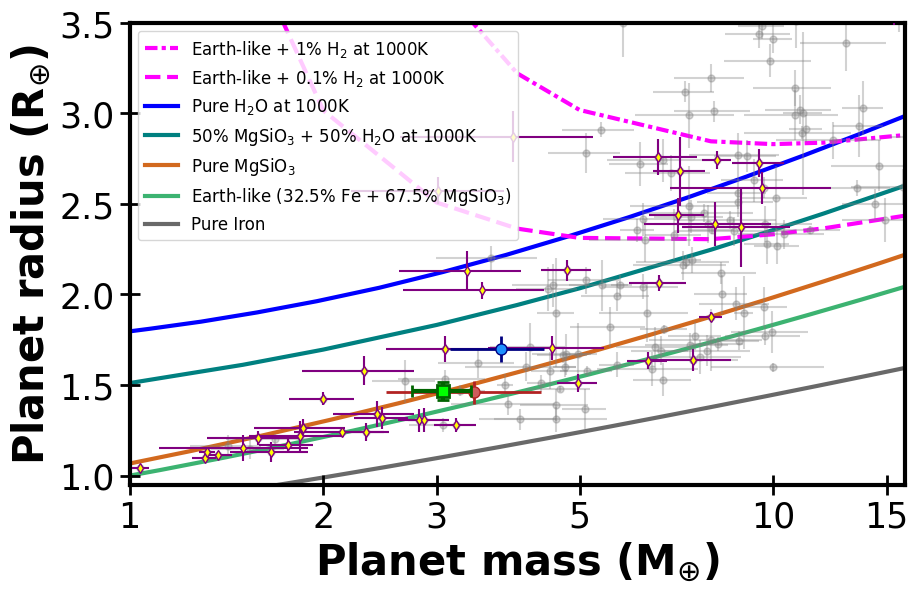

In [6]:
#Plot the FWHM data and GP model
plt.figure(1,[10,6])   #initialize figure dimensions

#initialize the figure
fig = plt.figure(1,[10,8])
ax1 = fig.add_subplot(1,1,1)

#Plot Composition Curves
iron,=ax1.plot(Zeng_PureIron['mass'],Zeng_PureIron['radius'],color='dimgrey',linewidth=3,zorder=1,label='Pure Iron')
earth,=ax1.plot(Zeng_EarthLike['mass'],Zeng_EarthLike['radius'],color='mediumseagreen',linewidth=3,zorder=1,label='Earth-like (32.5$\%$ Fe + 67.5$\%$ MgSiO$_{\mathrm{3}}$)')
rock,=ax1.plot(Zeng_PureRock['mass'],Zeng_PureRock['radius'],color='chocolate',linewidth=3,zorder=1,label='Pure MgSiO$_{\mathrm{3}}$')
water,=ax1.plot(Zeng_PureWater['mass'],Zeng_PureWater['radius'],color='blue',linewidth=3,zorder=1,label='Pure H$_{\mathrm{2}}$O at 1000K')
waterrock,=ax1.plot(Zeng_HalfWaterHalfRock['mass'],Zeng_HalfWaterHalfRock['radius'],color='teal',linewidth=3,zorder=1,label='50$\%$ MgSiO$_{\mathrm{3}}$ + 50$\%$ H$_{\mathrm{2}}$O at 1000K')
earth_1percenth2,=ax1.plot(Zeng_EarthLike_1percentH2['mass'],Zeng_EarthLike_1percentH2['radius'],color='magenta',linestyle=(0, (3, 1, 1, 1)),linewidth=3,zorder=1,label='Earth-like + 1% H$_{2}$ at 1000K')
earth_point1percenth2,=ax1.plot(Zeng_EarthLike_point1percentH2['mass'],Zeng_EarthLike_point1percentH2['radius'],color='magenta',linestyle='--',linewidth=3,zorder=1,label='Earth-like + 0.1% H$_{2}$ at 1000K')


ax1.legend(handles=[earth_1percenth2, earth_point1percenth2, water, waterrock, rock, earth, iron],loc='upper left',fontsize=12)

#plot MR data from the exoplanet archive
ax1.errorbar(MR_Data['mass'][MR_Data['mass_sigma']>=5], MR_Data['radius'][MR_Data['mass_sigma']>=5], 
        xerr=MR_Data['mass_err1'][MR_Data['mass_sigma']>=5], yerr=MR_Data['radius_err1'][MR_Data['mass_sigma']>=5],
        linestyle='none',markerfacecolor='grey',alpha=.35,
        markeredgecolor='grey',ecolor='grey',marker='o',ms=5,zorder=2)

ax1.errorbar(JWST_Plot['mass'][JWST_Plot['mass_sigma']>=3], JWST_Plot['radius'][JWST_Plot['mass_sigma']>=3], 
        xerr=JWST_Plot['mass_err1'][JWST_Plot['mass_sigma']>=3], yerr=JWST_Plot['radius_err1'][JWST_Plot['mass_sigma']>=3],
        linestyle='none',markerfacecolor='yellow',linewidth=1.5,
        markeredgecolor='purple',ecolor='purple',marker='d',ms=5,zorder=3)

#plot data for TOI-1685 b
masses=[3.78,3.43,3.07]     #Bluhm, Hirano, Burt
mass_errs=[0.63,0.93,0.32]  #Bluhm, Hirano, Burt
radii=[1.70,1.459,1.468]      #Bluhm, Hirano, Burt
radii_errs=[0.07,0.065,0.051] #Bluhm, Hirano, Burt

ax1.errorbar(masses[0], radii[0],xerr=mass_errs[0],yerr=radii_errs[0],
        linestyle='none',markerfacecolor='dodgerblue',linewidth=2,
        markeredgecolor='navy',ecolor='navy',marker='o',ms=8,zorder=4)

ax1.errorbar(masses[1], radii[1],xerr=mass_errs[1],yerr=radii_errs[1],
        linestyle='none',markerfacecolor='indianred',linewidth=2,
        markeredgecolor='firebrick',ecolor='firebrick',marker='o',ms=8,zorder=4)

ax1.errorbar(masses[2], radii[2],xerr=mass_errs[2],yerr=radii_errs[2],
        linestyle='none',markerfacecolor='lime',markeredgewidth=2,capsize=4,linewidth=3,
        markeredgecolor='darkgreen',ecolor='darkgreen',marker='s',ms=8,zorder=5)

#ax1.tick_params(axis='both', which='major', labelsize=32)
ax1.set_xlabel('Planet mass (M$_{\oplus}$)',fontsize=30,fontweight='bold')
ax1.set_ylabel('Planet radius (R$_{\oplus}$)',fontsize=30,fontweight='bold')

ax1.tick_params(axis='both',which='major',labelsize=25,direction='inout',length=15,width=2)

ax1.set_ylim(0.95,3.5)
ax1.set_xlim(1,16)

ax1.set_xscale('log', base=2)

ax1.set_xticks([1,2,3,5,10,15])
ax1.set_xticklabels(['1','2','3','5','10','15'])

ax1.set_yticks([1.0,1.5,2,2.5,3,3.5])
ax1.set_yticklabels(['1.0','1.5','2.0','2.5','3.0','3.5'])

plt.setp(ax1.spines.values(), linewidth=3)

plt.show() 
#plt.tight_layout()                        #Set the figure to have no extra white space on the borders
#plt.savefig('TOI1685b_MR_Diagram.pdf')    #Save the figure

## Figure 6: Running Periodogram Figure (left panel)

In [ ]:
#SBGLS import

# Copyright (c) 2016-2017 A. Mortier
# Distributed under the MIT License
###################################
# Permission is hereby granted, free of charge, 
# to any person obtaining a copy of this software 
# and associated documentation files (the "Software"),
# to deal in the Software without restriction, including 
# without limitation the rights to use, copy, modify,
# merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to
# whom the Software is furnished to do so, subject
# to the following conditions:
# The above copyright notice and this permission
# notice shall be included in all
# copies or substantial portions of the Software.
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT
# WARRANTY OF ANY KIND, EXPRESS OR IMPLIED,
# INCLUDING BUT NOT LIMITED TO THE WARRANTIES
# OF MERCHANTABILITY, FITNESS FOR A PARTICULAR
# PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR
# ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
# IN AN ACTION OF CONTRACT, TORT OR OTHERWISE,
# ARISING FROM, OUT OF OR IN CONNECTION WITH THE
# SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.
##################################
# This code was the basis for the following works
# Mortier et al. 2015
# http://adsabs.harvard.edu/abs/2015A%26A...573A.101M
# Mortier et al. 2017
# http://adsabs.harvard.edu/abs/2017A%26A...601A.110M
# Please cite these works if you use this.
 
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
 
# Predefine pi
pi = np.pi
 
def bgls(t, y, err, plow=0.5, phigh=100, ofac=1, jit=0.0, dt = None):
    '''
    BGLS: Calculates Bayesian General Lomb-Scargle
        periodogram, normalised with minimum.
 
    t: times
    y: data
    err: error bars
    plow: lowest period to sample
    phigh: highest period to sample
    ofac: oversampling factor
    jit: white noise to be added to the error bars
    dt: time span to be considered
    '''
 
    # Define time span
    if dt == None:
        dt = np.max(t)-np.min(t)
 
    # Amount of frequencies to sample
    amount = (phigh-plow)*dt*ofac/plow/phigh + 1
 
    # Define frequencies
    f = np.linspace(1./phigh, 1./plow, int(amount))
 
    omegas = 2. * pi * f
 
    # Define weights - optional white noise can be added
    err2 = err * err + jit * jit
    w = 1./err2
    W = sum(w)
 
    # Follow algorithm in Mortier et al. 2015
    bigY = sum(w*y)
 
    p = []
    constants = []
    exponents = []
 
    for i, omega in enumerate(omegas):
        theta = 0.5 * np.arctan2(sum(w*np.sin(2.*omega*t)),
            sum(w*np.cos(2.*omega*t)))
        x = omega*t - theta
        cosx = np.cos(x)
        sinx = np.sin(x)
        wcosx = w*cosx
        wsinx = w*sinx
 
        C = sum(wcosx)
        S = sum(wsinx)
 
        YCh = sum(y*wcosx)
        YSh = sum(y*wsinx)
        CCh = sum(wcosx*cosx)
        SSh = sum(wsinx*sinx)
 
        if (CCh != 0 and SSh != 0):
            K = ((C*C*SSh + S*S*CCh - W*CCh*SSh)/
                (2.*CCh*SSh))
 
            L = ((bigY*CCh*SSh - C*YCh*SSh - S*YSh*CCh)/
                (CCh*SSh))
 
            M = ((YCh*YCh*SSh + YSh*YSh*CCh)/
                (2.*CCh*SSh))
 
            constants.append(1./np.sqrt(CCh*SSh*abs(K)))
 
        elif (CCh == 0):
            K = (S*S - W*SSh)/(2.*SSh)
 
            L = (bigY*SSh - S*YSh)/(SSh)
 
            M = (YSh*YSh)/(2.*SSh)
 
            constants.append(1./np.sqrt(SSh*abs(K)))
 
        elif (SSh == 0):
            K = (C*C - W*CCh)/(2.*CCh)
 
            L = (bigY*CCh - C*YCh)/(CCh)
 
            M = (YCh*YCh)/(2.*CCh)
 
            constants.append(1./np.sqrt(CCh*abs(K)))
 
        if K > 0:
            raise RuntimeError('K is positive.\
                This should not happen.')
 
        exponents.append(M - L*L/(4.*K))
 
    constants = np.array(constants)
    exponents = np.array(exponents)
 
    logp = (np.log10(constants) +
        (exponents * np.log10(np.exp(1.))))
 
    # Add in errors in case you wouldn't want to normalise and compare with other sets.
    logp = logp - np.sum(np.log10(np.sqrt(err2)))
 
    # Normalise
    logp = logp - min(logp)
 
    # Return array of frequencies and log of probability
    return f, logp
 
def sbgls(t, y, err, obsstart = 5, plow=0.5, phigh=100,
        ofac=1, jit=0.0, fig='no'):
 
    '''
    SBGLS: Calculates Stacked BGLS periodogram
    Can plot figure
 
    t: times
    y: data
    err: error bars
    obsstart: minimum number of observations to start
    plow: lowest period to sample
    phigh: highest period to sample
    ofac: oversampling factor
    jit: white noise to be added to the error bars
    fig: creating figure
    '''
 
    n = len(t)
 
    # Timespan
    dt = np.max(t)-np.min(t)
 
    # Empty lists to fill for sbgls
    freqs = []
    powers = []
    nrobs = []
 
    # Do BGLS for every set of observations
    # and save results
    for i in range(obsstart,n+1):
 
        freq, power = bgls(t[:i], y[:i], err[:i],
                plow=plow, phigh=phigh,
                ofac=ofac, jit=jit, dt = dt)
 
        freqs.extend(freq)
        powers.extend(power)
        nrobs.extend(np.zeros(len(freq))+i)
 
    freqs = np.array(freqs)
    powers = np.array(powers)
    nrobs = np.array(nrobs)
 
    # Make figure
    if fig == 'yes':
 
        plt.scatter(1./freqs, nrobs, c=powers,
                cmap = plt.get_cmap('Reds'),
                lw=0, marker = 's')
 
        plt.xlim(min(1./freqs),max(1./freqs))
        plt.ylim(min(nrobs),max(nrobs))
 
        plt.xlabel('Period (days)',fontsize=16)
        plt.ylabel('Nr of observations',fontsize=16)
 
        plt.gca().set_xscale('log')
 
        cbar = plt.colorbar()
        cbar.set_label(r'$\log P',
                fontsize=14)
 
    return freqs, nrobs, powers
 
def bgls_freq(t, y, err, freq, jit = 0.0):
 
    omega = 2. * pi * freq
 
    err2 = err * err + jit * jit 
    w = 1./err2
    W = sum(w)
 
    bigY = sum(w*y) # Eq. (10)
    YYh = sum(w*y*y)
 
    nrobs = len(t)
 
    theta = 0.5 * np.arctan2(sum(w*np.sin(2.*omega*t)), sum(w*np.cos(2.*omega*t)))
    x = omega*t - theta
    cosx = np.cos(x)
    sinx = np.sin(x)
    wcosx = w*cosx
    wsinx = w*sinx
 
    C = sum(wcosx)
    S = sum(wsinx)
 
    YCh = sum(y*wcosx)
    YSh = sum(y*wsinx)
    CCh = sum(wcosx*cosx)
    SSh = sum(wsinx*sinx)
 
    detD = (CCh*W-C*C)*(SSh*W-S*S)-C*C*S*S
 
    coeffA = (SSh*YCh*W*W - SSh*bigY*C*W - YCh*S*S*W + YSh*C*S*W)/detD
    coeffB = (CCh*YSh*W*W - CCh*bigY*S*W - YSh*C*C*W + YCh*C*S*W)/detD
    gamma = (bigY-coeffA*C-coeffB*S)/W
 
    model = coeffA * cosx + coeffB * sinx + gamma
 
    K = np.sqrt(coeffA**2.+coeffB**2.)
    sinphi = (model-gamma)/K
    varK = 1./sum(sinphi*sinphi/err2)
    SNR = K/np.sqrt(varK)
 
    chi2 = sum((y-model)**2./err2)
    logL = -nrobs/2.*np.log(2.*pi) - sum(np.log(err2))/2. - chi2/2.
 
    return logL, SNR, K, model
 
def SNRvsOBS(t, y, err, freq, jitvalues, obsstart = 5):
    '''
    This is to get the SNR versus amount of observations plot.
 
    From the 5 returned arrays, you want to plot 
    the first one on the x-axis, the second one on the y-axis.
    '''
 
    n = len(t)
    nj = len(jitvalues)
 
    maxSNRs = []
    bestKs = []
 
    for i in range(obsstart,n+1):
 
        # Determine best jitter and corresponding SNR for freq
 
        logL0s = np.zeros(nj)
        SNR0s = np.zeros(nj)
        Kmodels = np.zeros(nj)
        highlog = -np.inf
 
        for ind,jitvalue in enumerate(jitvalues):
 
            logL0, SNR0, Kmodel, model = bgls_freq(t[:i], 
                    y[:i], err[:i], freq, jit = jitvalue)
 
            logL0s[ind] = logL0
            SNR0s[ind] = SNR0
            Kmodels[ind] = Kmodel
            if i == n:
 
                #if logL0 &amp;amp;gt; highlog:
                if logL0 > highlog:
                    optmodel = model
                    optjit = jitvalue
                    highlog = logL0
 
        SNRmax = SNR0s[np.argmax(logL0s)]
        maxSNRs.append(SNRmax)
        bestK = Kmodels[np.argmax(logL0s)]
        bestKs.append(bestK)
 
    return range(obsstart,n+1), np.array(maxSNRs), np.array(bestKs), optmodel, optjit

In [2]:
#Data Prep

RV_data=pd.read_csv('~/Dropbox/Research/PythonPackages/pyaneti/inpy/TOI1685_1D_1cp/rvs_no2021.dat',names=['date','rv','rv_err','inst'],delim_whitespace=True)
RV_data.sort_values(by=['date'],inplace=True)

RV_data.reset_index(inplace=True,drop='Index')

CARMENES_offset = -0.0011986
MXB_2020_offset = -0.0017466
MXR_2020_offset = -0.0017953
MXB_2021_offset = 0.0008517
MXR_2021_offset = 0.0008425
IRD_offset = -0.0019917

CARMENES_jitter = 2.6167110
MXB_2020_jitter = 1.0367497
MXR_2020_jitter = 1.4525220
MXB_2021_jitter = 0.8749133
MXR_2021_jitter = 1.1090792
IRD_jitter = 0.7530389

offset_array=np.empty_like(RV_data['date'])
offset_array[RV_data['inst'] == 'CARMENES'] = CARMENES_offset
offset_array[RV_data['inst'] == 'IRD'] = IRD_offset
offset_array[RV_data['inst'] == 'MXB_20'] = MXB_2020_offset
offset_array[RV_data['inst'] == 'MXR_20'] = MXR_2020_offset
offset_array[RV_data['inst'] == 'MXB_21'] = MXB_2021_offset
offset_array[RV_data['inst'] == 'MXR_21'] = MXR_2021_offset

jitter_array=np.empty_like(RV_data['date'])
jitter_array[RV_data['inst'] == 'CARMENES'] = CARMENES_jitter
jitter_array[RV_data['inst'] == 'IRD'] = IRD_jitter
jitter_array[RV_data['inst'] == 'MXB_20'] = MXB_2020_jitter
jitter_array[RV_data['inst'] == 'MXR_20'] = MXR_2020_jitter
jitter_array[RV_data['inst'] == 'MXB_21'] = MXB_2021_jitter
jitter_array[RV_data['inst'] == 'MXR_21'] = MXR_2021_jitter

RV_data['offset']=offset_array
RV_data['jitter']=jitter_array

#Run sbgls
freqs, nrobs, powers = sbgls(RV_data['date'],RV_data['rv']-RV_data['offset'],RV_data['rv_err'],obsstart=5,plow=0.4,phigh=30,ofac=5,jit=0,fig='no')

#Make Figure

cmap=cm.get_cmap('Purples')

fig = plt.figure(1,[7,6])
ax1 = fig.add_subplot(1,1,1)

y_vals=np.arange(len(RV_data))
x_vals=[25.]*len(RV_data)

sp=ax1.scatter(1./freqs, nrobs, c=powers,cmap = cmap,lw=0, marker = 's',zorder=1)

#ax1.scatter(x_vals[test[0]],y_vals[test[0]],marker='s',color='navy',lw=0)

ax1.plot([period_planetb,period_planetb],[0,40],color='forestgreen',linewidth=1,zorder=2)
ax1.plot([period_bluhm,period_bluhm],[0,40],color='navy',linewidth=1,zorder=2)
ax1.plot([period_hirano,period_hirano],[0,40],color='firebrick',linewidth=1,zorder=2)

ax1.set_xlim(min(1./freqs),max(1./freqs))
ax1.set_ylim(min(nrobs),max(nrobs))
ax1.set_xscale('log')

ax1.set_xlabel('Period (days)',fontsize=16)
ax1.set_ylabel('Number of observations',fontsize=16)

ax1.tick_params(axis='both',which='major',labelsize=16,direction='inout',length=15,width=2)
ax1.tick_params(axis='both',which='minor',labelsize=10,direction='inout',length=10,width=1)

cbar = fig.colorbar(sp)
cbar.set_label('log P',fontsize=14)

#plt.show()
plt.tight_layout()
plt.savefig('TOI1685_SBGLS.pdf',dpi=200)

0.005730892223757012
0.005784649039762362
0.005698303831518739


## Figure 6: Signal Strength vs. Number of Observations (right panel)

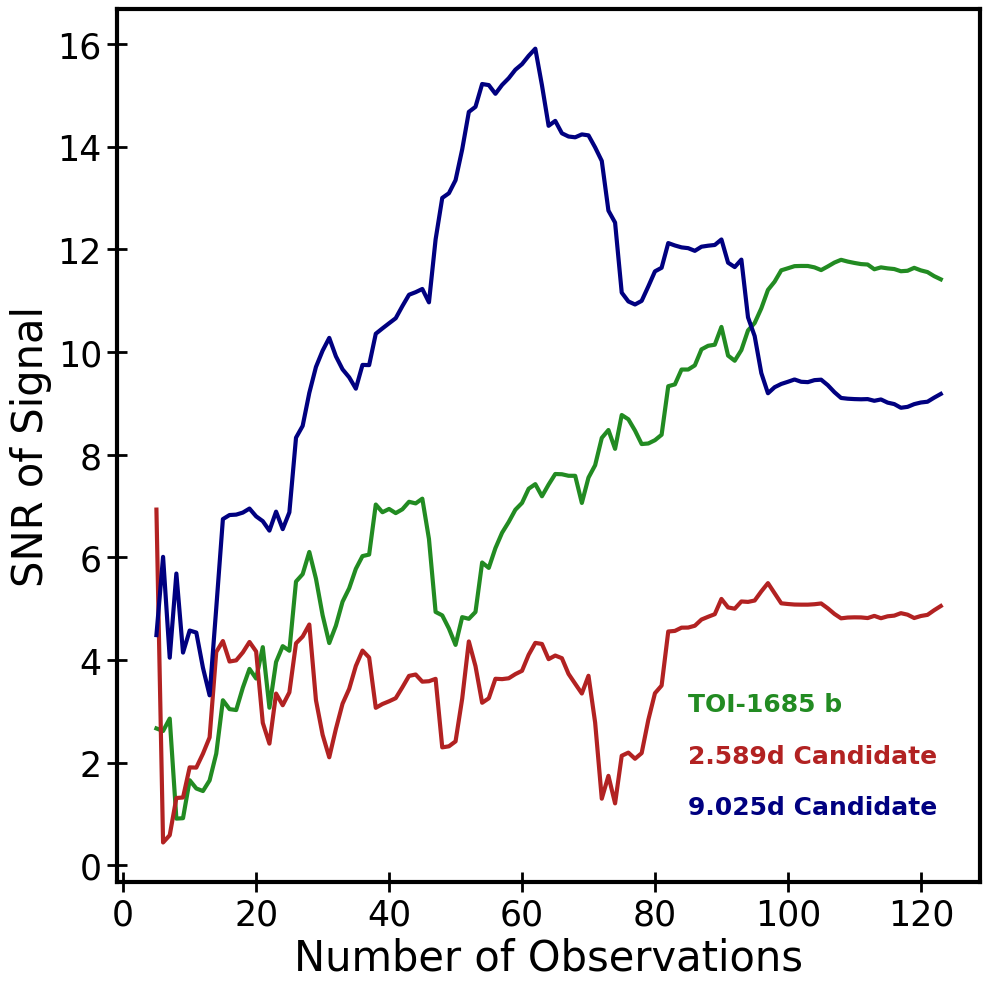

In [13]:
period_planetb=0.6691392
period_bluhm=9.025
period_hirano=2.5891

snrvobs_planetb=SNRvsOBS(RV_data['date'],RV_data['rv']-RV_data['offset'],RV_data['rv_err'], 1/period_planetb, [0.0], obsstart = 5)
snrvobs_hirano=SNRvsOBS(RV_data['date'],RV_data['rv']-RV_data['offset'],RV_data['rv_err'], 1/period_hirano,  [0.0], obsstart = 5)
snrvobs_bluhm=SNRvsOBS(RV_data['date'],RV_data['rv']-RV_data['offset'],RV_data['rv_err'], 1/period_bluhm,  [0.0], obsstart = 5)


#initialize the figure
fig = plt.figure(1,[10,10])
ax1 = fig.add_subplot(1,1,1)

ax1.plot(snrvobs_planetb[0],snrvobs_planetb[1],color='forestgreen',linewidth=3)
ax1.plot(snrvobs_hirano[0],snrvobs_hirano[1],color='firebrick',linewidth=3)
ax1.plot(snrvobs_bluhm[0],snrvobs_bluhm[1],color='navy',linewidth=3)

ax1.text(85,3,'TOI-1685 b',color='forestgreen',fontsize=18,fontweight='bold')
ax1.text(85,2,'2.589d Candidate',color='firebrick',fontsize=18,fontweight='bold')
ax1.text(85,1,'9.025d Candidate',color='navy',fontsize=18,fontweight='bold')

#ax1.tick_params(axis='both', which='major', labelsize=32)
ax1.set_xlabel('Number of Observations',fontsize=30)#,fontweight='bold')
ax1.set_ylabel('SNR of Signal',fontsize=30)#,fontweight='bold')

ax1.tick_params(axis='both',which='major',labelsize=25,direction='inout',length=15,width=2)

#ax1.set_ylim(0.95,3.5)
#ax1.set_xlim(1,20)

plt.setp(ax1.spines.values(), linewidth=3)

#plt.show()

plt.tight_layout()
plt.savefig('TOI1685_SBGLS_SNRvOBS.pdf')

## Activity Indicator Periodogram Check

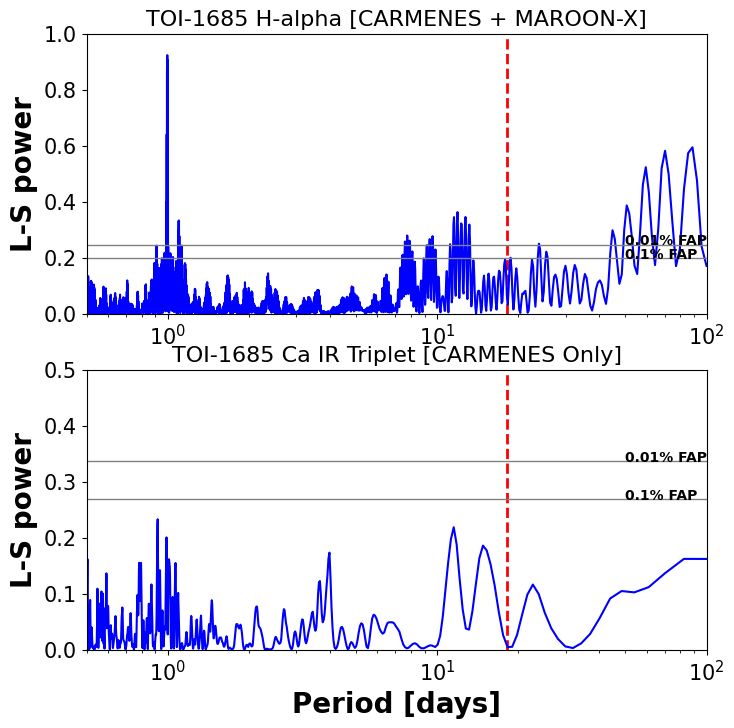

<Figure size 640x480 with 0 Axes>

In [64]:
from astropy.timeseries import LombScargle as AP_LS
act_data = pd.read_csv('TOI1685_ActivityIndicators.csv')

plt.figure(1,[8,8])   #initialize figure dimensions
ax1=plt.subplot(211)   #initialize the figure itself

minfreq=0.01 #set min frequency of the LS periodogram: corresponds to a maximum period of 1/f, or 1000 days
maxfreq=2.0   #set max frequency of the LS periodogram: corresponds to a minimum period of 1/f, or 0.5 days

ls = AP_LS(act_data['BJD'][act_data['Inst']!='M'], act_data['Halpha'])  #Analyze our dates and s-index data using the AstroPy Lomb Scargle module
frequency,power = ls.autopower(minimum_frequency=minfreq,maximum_frequency=maxfreq) #Determine the LS periodogram

ax1.vlines(18.15,0,1,color='red',linestyles='--',linewidth=2)
ax1.semilogx(1/frequency,power,color='blue')  #Plot the resulting periods (1/the freq from the LS result) and LS power

ax1.set(xlim=([0.5,100]),ylim=([0,1]))           #Set y-axis to go from 0 to 10% above the max peak height
ax1.set_title('TOI-1685 H-alpha [CARMENES + MAROON-X]',fontsize=16)             #Set the plot title
ax1.set_ylabel('L-S power',fontsize=20,fontweight='bold')       #Set the y-axis
#ax1.set_xlabel('Period [days]',fontsize=20,fontweight='bold')   #Set the x-axis
ax1.tick_params(axis='both',which='major',labelsize=15)         #Set the size of the tick marks

#Figure out the L-S Power levels that correspond to some False Alarm Probability values
FAP_probabilities = [0.1, 0.01]                         #Enter FAP values you want to determine
FAP_levels=ls.false_alarm_level(FAP_probabilities)           #Get corresponding LS Power values
ax1.hlines(FAP_levels,0.5,1000,color='grey',linewidth=1,)    #Plot the result as horizontal lines on the figure
ax1.text(50,FAP_levels[0],'0.1% FAP',fontsize=10,fontweight='bold')
ax1.text(50,FAP_levels[1],'0.01% FAP',fontsize=10,fontweight='bold')

#CRT
ls = AP_LS(act_data['BJD'][act_data['Inst']=='CAR'], act_data['CaIRT'][act_data['Inst']=='CAR'])  #Analyze our dates and s-index data using the AstroPy Lomb Scargle module
frequency,power = ls.autopower(minimum_frequency=minfreq,maximum_frequency=maxfreq) #Determine the LS periodogram

ax2=plt.subplot(212)   #initialize the figure itself
ax2.vlines(18.15,0,1,color='red',linestyles='--',linewidth=2)
ax2.semilogx(1/frequency,power,color='blue')  #Plot the resulting periods (1/the freq from the LS result) and LS power

ax2.set(xlim=([0.5,100]),ylim=([0,0.5]))           #Set y-axis to go from 0 to 10% above the max peak height
ax2.set_title('TOI-1685 Ca IR Triplet [CARMENES Only]',fontsize=16)             #Set the plot title
ax2.set_ylabel('L-S power',fontsize=20,fontweight='bold')       #Set the y-axis
ax2.set_xlabel('Period [days]',fontsize=20,fontweight='bold')   #Set the x-axis
ax2.tick_params(axis='both',which='major',labelsize=15)         #Set the size of the tick marks

#Figure out the L-S Power levels that correspond to some False Alarm Probability values
FAP_probabilities = [0.1, 0.01]                         #Enter FAP values you want to determine
FAP_levels=ls.false_alarm_level(FAP_probabilities)           #Get corresponding LS Power values
ax2.hlines(FAP_levels,0.5,1000,color='grey',linewidth=1,)    #Plot the result as horizontal lines on the figure
ax2.text(50,FAP_levels[0],'0.1% FAP',fontsize=10,fontweight='bold')
ax2.text(50,FAP_levels[1],'0.01% FAP',fontsize=10,fontweight='bold')
#print('LS power for FAPs of 0.5, 0.5, 0.01',FAP_levels)    #Print out the results if you want
 
#See what the FAP is for the peak we see in the data
FAP=ls.false_alarm_probability(power.max())                  #Calculate the FAP for the highest peak in the power array
peak_loc=round(float(1/frequency[power == power.max()]),2)   #Get the period of the highest peak, rounded to 0.01 days
 
plt.show() 
plt.tight_layout()                                           #Set the figure to have no extra white space on the borders
#plt.savefig('HD136352_HARPS_WF.pdf')                              #Save the figure

## Figure 7: RV Inj/Rec completeness plot (left panel)

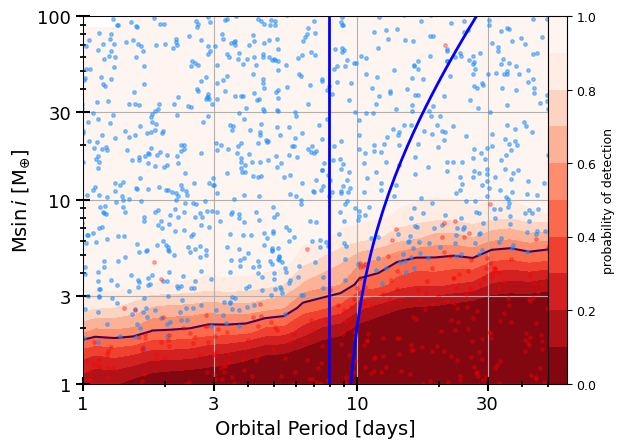

In [1]:
import pylab as pl
import pandas as pd

import rvsearch
from rvsearch.inject import Completeness
from rvsearch.plots import CompletenessPlots

recfile = 'TOI-1685-HalfAU/recoveries.csv'
comp = Completeness.from_csv(recfile, 'inj_period', 'inj_msini', mstar=0.454)

xi, yi, zi = comp.completeness_grid(xlim=(0.5, 50), ylim=(1.0, 100), resolution=25)

cp = CompletenessPlots(comp)
fig = cp.completeness_plot(xlabel='Orbital Period [days]', ylabel=r'M$\sin{i}$ [M$_{\oplus}$]')


## Convert perturber mass/period curves to radius/period

In [4]:
import pandas as pd
import numpy as np

pert = pd.read_csv('PerturberContours_0.05AU.txt',delim_whitespace=True,skiprows=1,names=['period','mass'])
radius=np.empty(len(pert))

#Calculate corresponding radii
for i in range(0,len(pert)):
    if pert['mass'][i]<= 4.4:
        radius[i] = 1.02 * (pert['mass'][i]**0.27)
    else:
        radius[i]= 0.56 * (pert['mass'][i]** 0.67)

pert['radius']=radius

pert.to_csv('PerturberPeriodMassRadiusContours_0.05AU.csv')

## Simulate data to check that GP isn't eating additional planet signals

In [ ]:
#import sys
sys.path.append('/Users/jenburt/Dropbox/Research/PythonPackages/pyaneti/')
import pyaneti as pti

#candidate parameters from Bluhm and Hirano papers
semiamp_bluhm = 4.53
to_bluhm = 8820.4
semiamp_hirano = 5.6
to_hirano = 8827.46

#read in pyaneti model & original rv data
py_model = pd.read_csv('/Users/jenburt/Dropbox/Research/PythonPackages/pyaneti/outpy/TOI1685_1D_1cp_final_out/timeseries_model0.dat',delim_whitespace=True,header=0)
py_data = pd.read_csv('/Users/jenburt/Dropbox/Research/PythonPackages/pyaneti/inpy/TOI1685_1D_1cp_final/all_rvs.dat',delim_whitespace=True,names=('date','rv','rv_err','inst'))

#initialize planet models at relevant dates

planetb_rv = pti.rv_curve_mp(py_model['date'],0.0,9910.9382820,0.6691392,0.0,np.pi/2.,3.7587222/1000.,0.0,0.0)

hirano_candidate_params = [to_hirano,period_hirano,0.0,np.pi/2.,semiamp_hirano/1000.]
hirano_candidate_rv = pti.rv_curve_mp(py_model['date'],0.0,to_hirano,period_hirano,0.0,np.pi/2.,semiamp_hirano/1000.,0.0,0.0)
hirano_model_rvs = py_model['stellar']/1000.+planetb_rv+hirano_candidate_rv

bluhm_candidate_params = [to_bluhm,period_bluhm,0.0,np.pi/2.,semiamp_bluhm/1000.]
bluhm_candidate_rv = pti.rv_curve_mp(py_model['date'],0.0,to_bluhm,period_bluhm,0.0,np.pi/2.,semiamp_bluhm/1000.,0.0,0.0)
bluhm_model_rvs = py_model['stellar']/1000.+planetb_rv+bluhm_candidate_rv

#Now down select to just the actual dates in the original RV data

hirano_sim_rv=np.empty(len(py_data))
bluhm_sim_rv=np.empty(len(py_data))

for i in range(0,len(py_data)):
    time_diff = np.abs(py_model['date']-py_data['date'][i])
    loc=np.where(time_diff == np.min(time_diff))
    hirano_sim_rv[i] = hirano_model_rvs[loc[0]]
    bluhm_sim_rv[i] = bluhm_model_rvs[loc[0]]


hirano_df = py_data.copy()
hirano_df['rv']=np.round(hirano_sim_rv,7)
hirano_df.to_csv('/Users/jenburt/Dropbox/Research/PythonPackages/pyaneti/inpy/TOI1685_1D_2cp_Hirano_SIM/sim_rvs.dat',index=False)

bluhm_df = py_data.copy()
bluhm_df['rv']=np.round(bluhm_sim_rv,7)
bluhm_df.to_csv('/Users/jenburt/Dropbox/Research/PythonPackages/pyaneti/inpy/TOI1685_1D_2cp_Bluhm_SIM/sim_rvs.dat',index=False)

## Activity indicator periodogram check

In [ ]:
from astropy.timeseries import LombScargle as AP_LS
act_data = pd.read_csv('TOI1685_ActivityIndicators.csv')

plt.figure(1,[8,8])   #initialize figure dimensions
ax1=plt.subplot(211)   #initialize the figure itself

minfreq=0.01 #set min frequency of the LS periodogram: corresponds to a maximum period of 1/f, or 1000 days
maxfreq=2.0   #set max frequency of the LS periodogram: corresponds to a minimum period of 1/f, or 0.5 days

ls = AP_LS(act_data['BJD'][act_data['Inst']!='M'], act_data['Halpha'])  #Analyze our dates and s-index data using the AstroPy Lomb Scargle module
frequency,power = ls.autopower(minimum_frequency=minfreq,maximum_frequency=maxfreq) #Determine the LS periodogram

ax1.vlines(18.15,0,1,color='red',linestyles='--',linewidth=2)
ax1.semilogx(1/frequency,power,color='blue')  #Plot the resulting periods (1/the freq from the LS result) and LS power

ax1.set(xlim=([0.5,100]),ylim=([0,1]))           #Set y-axis to go from 0 to 10% above the max peak height
ax1.set_title('TOI-1685 H-alpha [CARMENES + MAROON-X]',fontsize=16)             #Set the plot title
ax1.set_ylabel('L-S power',fontsize=20,fontweight='bold')       #Set the y-axis
#ax1.set_xlabel('Period [days]',fontsize=20,fontweight='bold')   #Set the x-axis
ax1.tick_params(axis='both',which='major',labelsize=15)         #Set the size of the tick marks

#Figure out the L-S Power levels that correspond to some False Alarm Probability values
FAP_probabilities = [0.1, 0.01]                         #Enter FAP values you want to determine
FAP_levels=ls.false_alarm_level(FAP_probabilities)           #Get corresponding LS Power values
ax1.hlines(FAP_levels,0.5,1000,color='grey',linewidth=1,)    #Plot the result as horizontal lines on the figure
ax1.text(50,FAP_levels[0],'0.1% FAP',fontsize=10,fontweight='bold')
ax1.text(50,FAP_levels[1],'0.01% FAP',fontsize=10,fontweight='bold')

#CRT
ls = AP_LS(act_data['BJD'][act_data['Inst']=='CAR'], act_data['CaIRT'][act_data['Inst']=='CAR'])  #Analyze our dates and s-index data using the AstroPy Lomb Scargle module
frequency,power = ls.autopower(minimum_frequency=minfreq,maximum_frequency=maxfreq) #Determine the LS periodogram

ax2=plt.subplot(212)   #initialize the figure itself
ax2.vlines(18.15,0,1,color='red',linestyles='--',linewidth=2)
ax2.semilogx(1/frequency,power,color='blue')  #Plot the resulting periods (1/the freq from the LS result) and LS power

ax2.set(xlim=([0.5,100]),ylim=([0,0.5]))           #Set y-axis to go from 0 to 10% above the max peak height
ax2.set_title('TOI-1685 Ca IR Triplet [CARMENES Only]',fontsize=16)             #Set the plot title
ax2.set_ylabel('L-S power',fontsize=20,fontweight='bold')       #Set the y-axis
ax2.set_xlabel('Period [days]',fontsize=20,fontweight='bold')   #Set the x-axis
ax2.tick_params(axis='both',which='major',labelsize=15)         #Set the size of the tick marks

#Figure out the L-S Power levels that correspond to some False Alarm Probability values
FAP_probabilities = [0.1, 0.01]                         #Enter FAP values you want to determine
FAP_levels=ls.false_alarm_level(FAP_probabilities)           #Get corresponding LS Power values
ax2.hlines(FAP_levels,0.5,1000,color='grey',linewidth=1,)    #Plot the result as horizontal lines on the figure
ax2.text(50,FAP_levels[0],'0.1% FAP',fontsize=10,fontweight='bold')
ax2.text(50,FAP_levels[1],'0.01% FAP',fontsize=10,fontweight='bold')
#print('LS power for FAPs of 0.5, 0.5, 0.01',FAP_levels)    #Print out the results if you want
 
#See what the FAP is for the peak we see in the data
FAP=ls.false_alarm_probability(power.max())                  #Calculate the FAP for the highest peak in the power array
peak_loc=round(float(1/frequency[power == power.max()]),2)   #Get the period of the highest peak, rounded to 0.01 days
 
plt.tight_layout()
plt.show() 
#plt.savefig('HD136352_HARPS_WF.pdf')                              #Save the figure